Testing the the use of computer vision to assist in creating metadata for the Tennessee Farm News

In [22]:
%matplotlib inline
import random
from pathlib import Path

import cv2
import numpy as np
import pandas as pd
from ipywidgets import IntProgress, Label, VBox
from IPython.display import display
from matplotlib import pyplot as plt
from PIL import Image
from skimage.measure import compare_ssim as ssim

import img_qc.img_qc as img_qc

In [8]:
def get_top_percent_of_image(image, percentage):
    width, height = image.size
    box = (0, 0, width, int(height * percentage))  # percentage as float
    image_cropped = image.crop(box)
    return image_cropped

In [4]:
data_dir_path = Path('/Volumes/fluffy/ProjectCeres/delivery/agrtfn/book')

page_1_paths_list = sorted(data_dir_path.glob('**/*_0001.tif'))
len(page_1_paths_list)

2493

This is processing all issues in {data_dir_path} from the Tennessee Farm News

In [6]:
number_of_grayscale = 0
number_of_rgb = 0
gray_image_paths_list = []
rgb_image_paths_list = []
for image_path in page_1_paths_list:
    image = Image.open(image_path)
    if image.mode == 'L':
        number_of_grayscale += 1
        gray_image_paths_list.append(image_path)
    elif image.mode == 'RGB':
        number_of_rgb += 1
        rgb_image_paths_list.append(image_path)
print(f'# of grayscale: {number_of_grayscale}')
print(f'      # of rgb: {number_of_rgb}')
print(f'  total images: {number_of_grayscale + number_of_rgb}')

# of grayscale: 1690
      # of rgb: 803
  total images: 2493


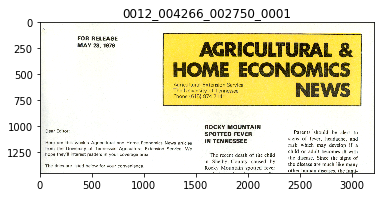

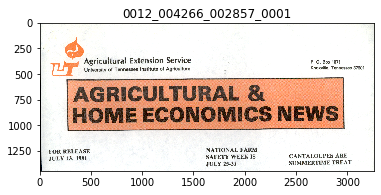

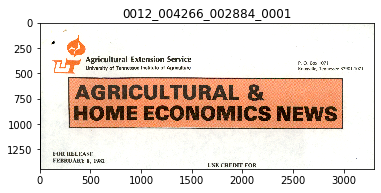

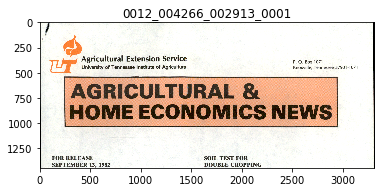

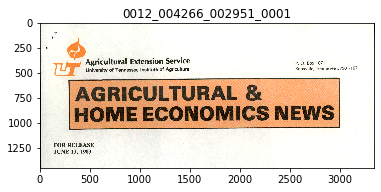

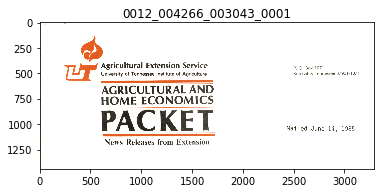

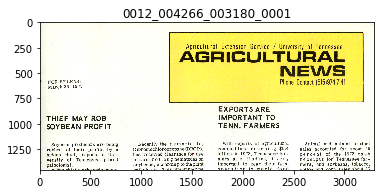

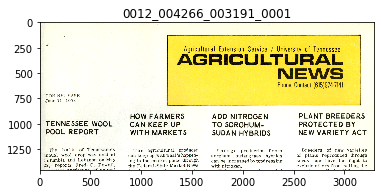

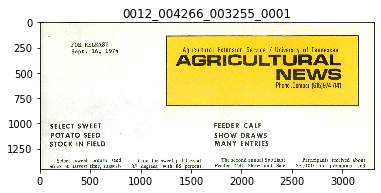

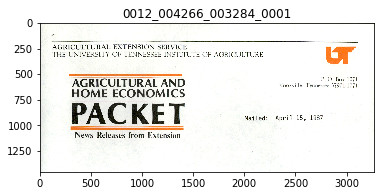

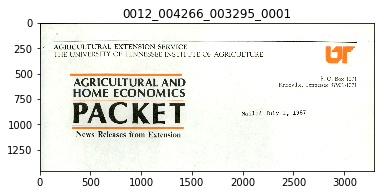

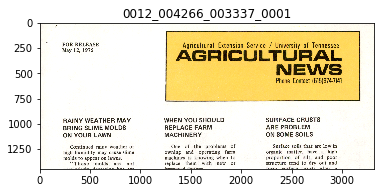

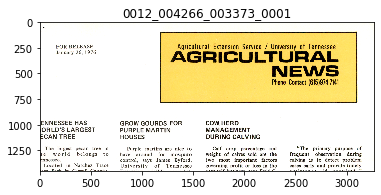

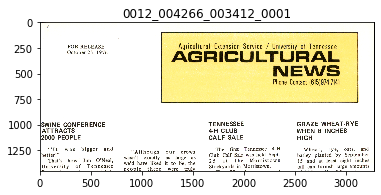

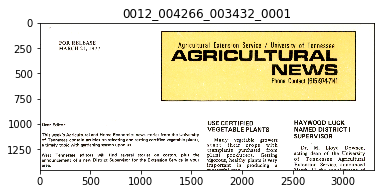

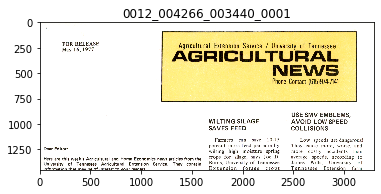

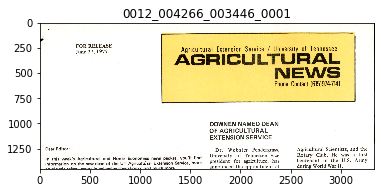

In [8]:
# let's look at the top 1/3 of the image of all the rgb images since there aren't that many
for image_path in rgb_image_paths_list:
    image = Image.open(image_path)
    width, height = image.size
    box = (0, 0, width, int(height/3))  # (left, upper, right, lower)
    image_cropped = image.crop(box)
    plt.imshow(image_cropped)
    plt.title(image_path.stem)
    plt.show()

it looks like the following titles have a page 1 in color:
* Agricultural & home economics news
* Agricultural and home economics packet
* Agricultural news

Furthermore, the amount of each color on the page is very different in each title, so an average image color may be enough to identify each title. The PROBLEM, and it's a pain, is that there are 2 versions of the Agricultural & Home Economic News, which means I need 2 versions of that one to process.

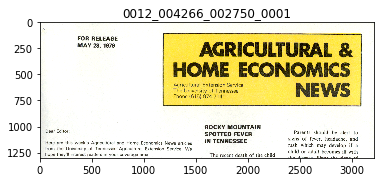

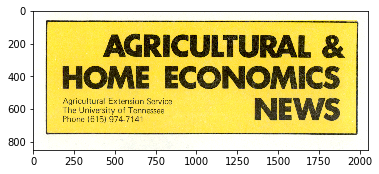

In [9]:
# get sample image from Agricultural & home economic news
ag_home_ec_news_yellow_path = [x for x in rgb_image_paths_list if x.stem.endswith('002750_0001')][0]
ag_home_ec_news_yellow = Image.open(ag_home_ec_news_yellow_path)
ag_home_ec_news_yellow = get_top_percent_of_image(ag_home_ec_news_yellow, 0.3)
plt.imshow(ag_home_ec_news_yellow)
plt.title(ag_home_ec_news_yellow_path.stem)
plt.show()

box = (1100, 50, 3150, 900)  # (left, upper, right, lower)
ag_home_ec_news_yellow_title_crop = ag_home_ec_news_yellow.crop(box)
plt.imshow(ag_home_ec_news_yellow_title_crop)
plt.show()

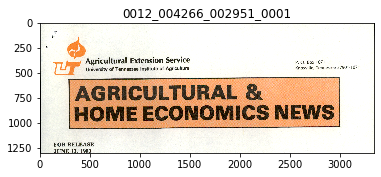

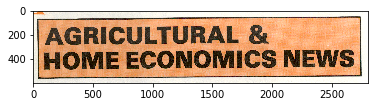

In [10]:
# get sample image from Agricultural & home economic news
ag_home_ec_news_orange_path = [x for x in rgb_image_paths_list if x.stem.endswith('002951_0001')][0]
ag_home_ec_news_orange = Image.open(ag_home_ec_news_orange_path)
ag_home_ec_news_orange = get_top_percent_of_image(ag_home_ec_news_orange, 0.3)
plt.imshow(ag_home_ec_news_orange)
plt.title(ag_home_ec_news_orange_path.stem)
plt.show()

box = (250, 500, 3050, 1100)  # (left, upper, right, lower)
ag_home_ec_news_orange_title_crop = ag_home_ec_news_orange.crop(box)
plt.imshow(ag_home_ec_news_orange_title_crop)
plt.show()

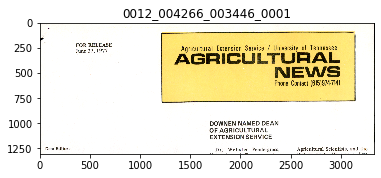

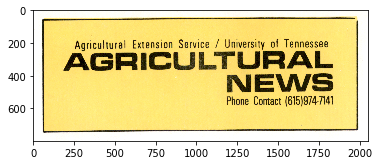

In [11]:
# get sample image from Agricultural news
ag_news_path = [x for x in rgb_image_paths_list if x.stem.endswith('003446_0001')][0]
ag_news = Image.open(ag_news_path)
ag_news = get_top_percent_of_image(ag_news, 0.3)
plt.imshow(ag_news)
plt.title(ag_news_path.stem)
plt.show()

box = (1150, 50, 3200, 850)  # (left, upper, right, lower)
ag_news_title_crop = ag_news.crop(box)
plt.imshow(ag_news_title_crop)
plt.show()

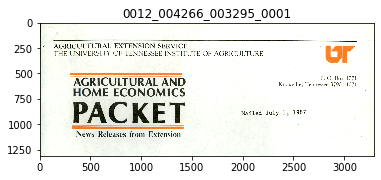

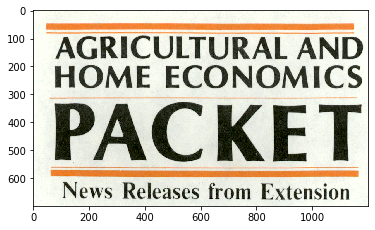

In [47]:
# get sample image from Agricultural and home economic packet
ag_home_ec_packet_path = [x for x in rgb_image_paths_list if x.stem.endswith('003295_0001')][0]
ag_home_ec_packet = Image.open(ag_home_ec_packet_path)
ag_home_ec_packet = get_top_percent_of_image(ag_home_ec_packet, 0.3)
plt.imshow(ag_home_ec_packet)
plt.title(ag_home_ec_packet_path.stem)
plt.show()

box = (250, 450, 1450, 1150)  # (left, upper, right, lower)
ag_home_ec_packet_title_crop = ag_home_ec_packet.crop(box)
plt.imshow(ag_home_ec_packet_title_crop)
plt.show()

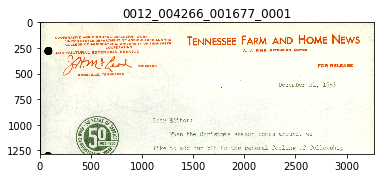

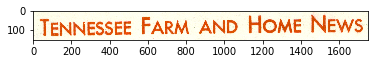

In [46]:
# get sample image from Tennesse farm and home news
tn_farm_home_news_path = [x for x in rgb_image_paths_list if x.stem.endswith('001677_0001')][0]
tn_farm_home_news = Image.open(tn_farm_home_news_path)
tn_farm_home_news = get_top_percent_of_image(tn_farm_home_news, 0.3)
plt.imshow(tn_farm_home_news)
plt.title(tn_farm_home_news_path.stem)
plt.show()

box = (1400, 100, 3150, 250)  # (left, upper, right, lower)
tn_farm_home_news_title_crop = tn_farm_home_news.crop(box)
plt.imshow(tn_farm_home_news_title_crop)
plt.show()

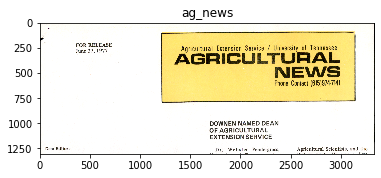

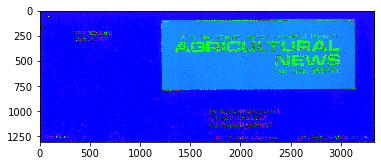

ag_news

hue mean: 13.92849668963604
hue median: 11.0

saturation mean: 47.81501946165132
saturation median: 1.0

value mean: 240.72183205012902
value median: 255.0


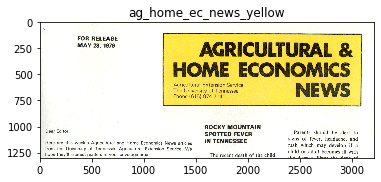

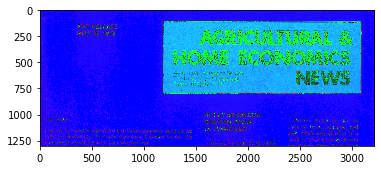

ag_home_ec_news_yellow

hue mean: 21.696590787415726
hue median: 26.0

saturation mean: 61.30593405952558
saturation median: 6.0

value mean: 230.40797095422198
value median: 255.0


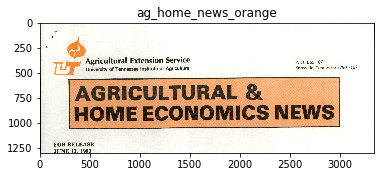

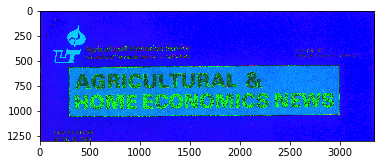

ag_home_news_orange

hue mean: 19.79731684129617
hue median: 20.0

saturation mean: 50.91476744057755
saturation median: 10.0

value mean: 226.00513636915292
value median: 254.0


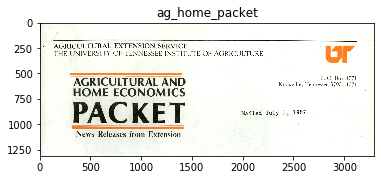

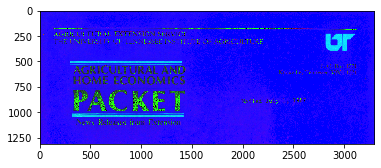

ag_home_packet

hue mean: 26.689130747111477
hue median: 30.0

saturation mean: 15.661606244911642
saturation median: 6.0

value mean: 238.76589725027978
value median: 255.0


In [13]:
# let's get the mean and median in the HSV color space
rgb_test_dict = {
    'ag_news': ag_news,
    'ag_home_ec_news_yellow': ag_home_ec_news_yellow,
    'ag_home_news_orange': ag_home_ec_news_orange,
    'ag_home_packet': ag_home_ec_packet,
}

for title in rgb_test_dict:
    image = rgb_test_dict[title]
    plt.imshow(image)
    plt.title(title)
    plt.show()
    
    hsv_cv2 = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2HSV)
    plt.imshow(hsv_cv2)
    plt.show()
    
    print(title)
    for index, channel in enumerate(['hue', 'saturation', 'value']):
        print('')
        channel_mean = np.mean(hsv_cv2[:, :, index])
        print(f'{channel} mean: {channel_mean}')
        channel_median = np.median(hsv_cv2[:, :, index])
        print(f'{channel} median: {channel_median}')

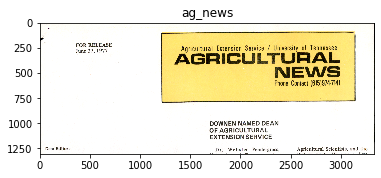

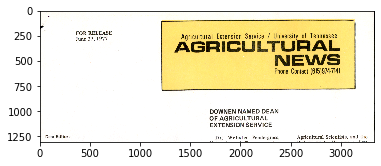

ag_news

red mean: 240.6453540072996
red median: 255.0

blue mean: 233.34929300510495
blue median: 255.0

green mean: 202.21443620923594
green median: 254.0


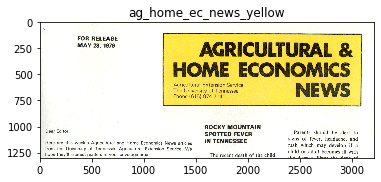

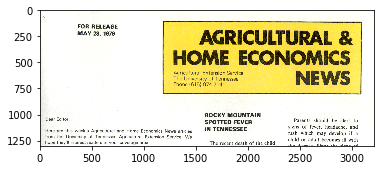

ag_home_ec_news_yellow

red mean: 230.05202226760127
red median: 255.0

blue mean: 223.73544962543164
blue median: 255.0

green mean: 184.47452160794796
green median: 248.0


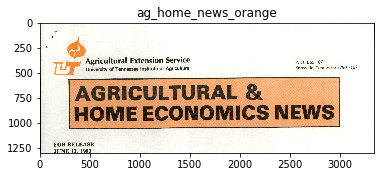

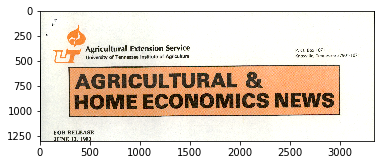

ag_home_news_orange

red mean: 225.68172509001172
red median: 254.0

blue mean: 207.56502037446353
blue median: 250.0

green mean: 190.45003590355597
green median: 240.0


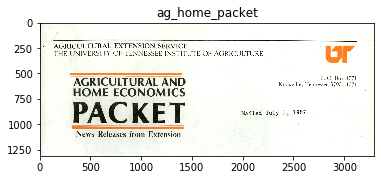

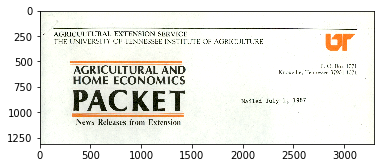

ag_home_packet

red mean: 237.10196982347867
red median: 255.0

blue mean: 236.3512038658448
blue median: 255.0

green mean: 228.88049048125714
green median: 248.0


In [14]:
# let's get the mean and median in the RGB color space
rgb_test_dict = {
    'ag_news': ag_news,
    'ag_home_ec_news_yellow': ag_home_ec_news_yellow,
    'ag_home_news_orange': ag_home_ec_news_orange,
    'ag_home_packet': ag_home_ec_packet,
}

for title in rgb_test_dict:
    image = rgb_test_dict[title]
    plt.imshow(image)
    plt.title(title)
    plt.show()
    
    rgb_cv2 = np.array(image)
    plt.imshow(rgb_cv2)
    plt.show()
    
    print(title)
    for index, channel in enumerate(['red', 'blue', 'green']):
        print('')
        channel_mean = np.mean(rgb_cv2[:, :, index])
        print(f'{channel} mean: {channel_mean}')
        channel_median = np.median(rgb_cv2[:, :, index])
        print(f'{channel} median: {channel_median}')

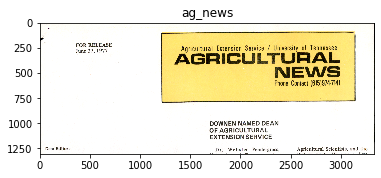

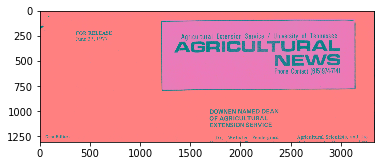

ag_news

L* mean: (234.5003353081298, 0.0, 0.0, 0.0)


AttributeError: module 'cv2' has no attribute 'median'

In [15]:
# let's get the mean and median in the lab color space
lab_test_dict = {
    'ag_news': ag_news,
    'ag_home_ec_news_yellow': ag_home_ec_news_yellow,
    'ag_home_news_orange': ag_home_ec_news_orange,
    'ag_home_packet': ag_home_ec_packet,
}

for title in lab_test_dict:
    image = lab_test_dict[title]
    plt.imshow(image)
    plt.title(title)
    plt.show()
    
    lab_cv2 = cv2.cvtColor(np.array(image), cv2.COLOR_RGB2LAB)
    plt.imshow(lab_cv2)
    plt.show()
    
    print(title)
    for index, channel in enumerate(['L*', 'a*', 'b*']):
        print('')
        channel_mean = cv2.mean(lab_cv2[:, :, index])
        print(f'{channel} mean: {channel_mean}')
        channel_median = cv2.median(lab_cv2[:, :, index])
        print(f'{channel} median: {channel_median}')

In [ ]:
# DON'T RUN: stackoverflow code that got me started with SIFT matching
# https://stackoverflow.com/a/48207339

#!/usr/bin/python3
# 2017.11.11 01:44:37 CST
# 2017.11.12 00:09:14 CST
"""
使用Sift特征点检测和匹配查找场景中特定物体。
"""

import cv2
import numpy as np
MIN_MATCH_COUNT = 4

imgname1 = "box.png"
imgname2 = "box_in_scene.png"

## (1) prepare data
img1 = cv2.imread(imgname1)
img2 = cv2.imread(imgname2)
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)


## (2) Create SIFT object
sift = cv2.xfeatures2d.SIFT_create()

## (3) Create flann matcher
matcher = cv2.FlannBasedMatcher(dict(algorithm = 1, trees = 5), {})

## (4) Detect keypoints and compute keypointer descriptors
kpts1, descs1 = sift.detectAndCompute(gray1,None)
kpts2, descs2 = sift.detectAndCompute(gray2,None)

## (5) knnMatch to get Top2
matches = matcher.knnMatch(descs1, descs2, 2)
# Sort by their distance.
matches = sorted(matches, key = lambda x:x[0].distance)

## (6) Ratio test, to get good matches.
good = [m1 for (m1, m2) in matches if m1.distance < 0.7 * m2.distance]

canvas = img2.copy()

## (7) find homography matrix
## 当有足够的健壮匹配点对（至少4个）时
if len(good)>MIN_MATCH_COUNT:
    ## 从匹配中提取出对应点对
    ## (queryIndex for the small object, trainIndex for the scene )
    src_pts = np.float32([ kpts1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kpts2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    ## find homography matrix in cv2.RANSAC using good match points
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    ## 掩模，用作绘制计算单应性矩阵时用到的点对
    #matchesMask2 = mask.ravel().tolist()
    ## 计算图1的畸变，也就是在图2中的对应的位置。
    h,w = img1.shape[:2]
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)
    ## 绘制边框
    cv2.polylines(canvas,[np.int32(dst)],True,(0,255,0),3, cv2.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good),MIN_MATCH_COUNT))


## (8) drawMatches
matched = cv2.drawMatches(img1,kpts1,canvas,kpts2,good,None)#,**draw_params)

## (9) Crop the matched region from scene
h,w = img1.shape[:2]
pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
dst = cv2.perspectiveTransform(pts,M)
perspectiveM = cv2.getPerspectiveTransform(np.float32(dst),pts)
found = cv2.warpPerspective(img2,perspectiveM,(w,h))

## (10) save and display
cv2.imwrite("matched.png", matched)
cv2.imwrite("found.png", found)
cv2.imshow("matched", matched);
cv2.imshow("found", found);
cv2.waitKey();cv2.destroyAllWindows()

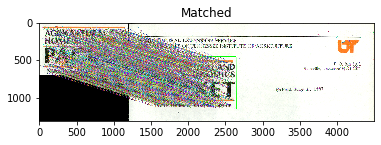

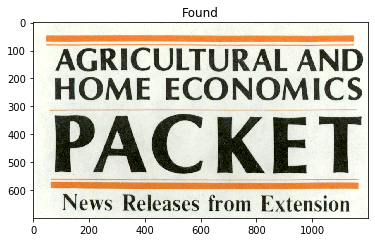

In [13]:
# try to match cropped title to scanned page
MIN_MATCH_COUNT = 4

image_search_for = np.array(ag_home_ec_packet_title_crop)
image_look_in = np.array(ag_home_ec_packet)

# grayscale images
image_search_for_gray = cv2.cvtColor(image_search_for, cv2.COLOR_RGB2GRAY)
image_look_in_gray = cv2.cvtColor(image_look_in, cv2.COLOR_RGB2GRAY)

## (2) Create SIFT object
sift = cv2.xfeatures2d.SIFT_create()

## (3) Create flann matcher
matcher = cv2.FlannBasedMatcher(dict(algorithm = 1, trees = 5), {})

## (4) Detect keypoints and compute keypointer descriptors
kpts1, descs1 = sift.detectAndCompute(image_search_for_gray,None)
kpts2, descs2 = sift.detectAndCompute(image_look_in_gray,None)

## (5) knnMatch to get Top2
matches = matcher.knnMatch(descs1, descs2, 2)
# Sort by their distance.
matches = sorted(matches, key = lambda x:x[0].distance)

## (6) Ratio test, to get good matches.
good = [m1 for (m1, m2) in matches if m1.distance < 0.7 * m2.distance]

canvas = image_look_in.copy()

## (7) find homography matrix
if len(good)>MIN_MATCH_COUNT:
    ## (queryIndex for the small object, trainIndex for the scene )
    src_pts = np.float32([ kpts1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kpts2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    ## find homography matrix in cv2.RANSAC using good match points
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    h,w = image_search_for.shape[:2]
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)
    cv2.polylines(canvas,[np.int32(dst)],True,(0,255,0),3, cv2.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good),MIN_MATCH_COUNT))


## (8) drawMatches
matched = cv2.drawMatches(image_search_for,kpts1,canvas,kpts2,good,None)#,**draw_params)

## (9) Crop the matched region from scene
h,w = image_search_for.shape[:2]
pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
dst = cv2.perspectiveTransform(pts,M)
perspectiveM = cv2.getPerspectiveTransform(np.float32(dst),pts)
found = cv2.warpPerspective(image_look_in,perspectiveM,(w,h))

# display images
plt.imshow(matched)
plt.title('Matched')
plt.show()
plt.imshow(found)
plt.title('Found')
plt.show()

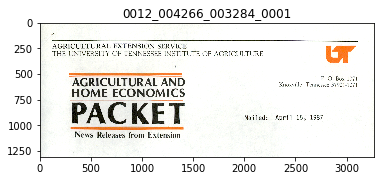

In [14]:
# load 2nd Ag home ec packet image to try and find title in
ag_home_ec_packet_test_path = [x for x in rgb_image_paths_list if x.stem.endswith('003284_0001')][0]
ag_home_ec_packet_test = Image.open(ag_home_ec_packet_test_path)
ag_home_ec_packet_test = get_top_percent_of_image(ag_home_ec_packet_test, 0.3)
plt.imshow(ag_home_ec_packet_test)
plt.title(ag_home_ec_packet_test_path.stem)
plt.show()

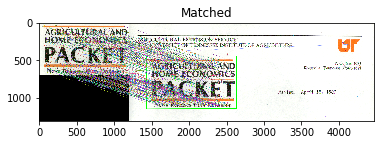

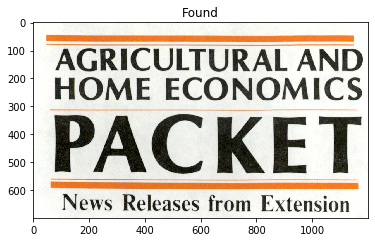

In [15]:
# try to match cropped title to a DIFFERENT scanned page!
MIN_MATCH_COUNT = 4

image_search_for = np.array(ag_home_ec_packet_title_crop)
image_look_in = np.array(ag_home_ec_packet_test)

# grayscale images
image_search_for_gray = cv2.cvtColor(image_search_for, cv2.COLOR_RGB2GRAY)
image_look_in_gray = cv2.cvtColor(image_look_in, cv2.COLOR_RGB2GRAY)

## (2) Create SIFT object
sift = cv2.xfeatures2d.SIFT_create()

## (3) Create flann matcher
matcher = cv2.FlannBasedMatcher(dict(algorithm = 1, trees = 5), {})

## (4) Detect keypoints and compute keypointer descriptors
kpts1, descs1 = sift.detectAndCompute(image_search_for_gray,None)
kpts2, descs2 = sift.detectAndCompute(image_look_in_gray,None)

## (5) knnMatch to get Top2
matches = matcher.knnMatch(descs1, descs2, 2)
# Sort by their distance.
matches = sorted(matches, key = lambda x:x[0].distance)

## (6) Ratio test, to get good matches.
good = [m1 for (m1, m2) in matches if m1.distance < 0.7 * m2.distance]

canvas = image_look_in.copy()

## (7) find homography matrix
if len(good)>MIN_MATCH_COUNT:
    ## (queryIndex for the small object, trainIndex for the scene )
    src_pts = np.float32([ kpts1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kpts2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
    ## find homography matrix in cv2.RANSAC using good match points
    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    h,w = image_search_for.shape[:2]
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)
    cv2.polylines(canvas,[np.int32(dst)],True,(0,255,0),3, cv2.LINE_AA)
else:
    print( "Not enough matches are found - {}/{}".format(len(good),MIN_MATCH_COUNT))


## (8) drawMatches
matched = cv2.drawMatches(image_search_for,kpts1,canvas,kpts2,good,None)#,**draw_params)

## (9) Crop the matched region from scene
h,w = image_search_for.shape[:2]
pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
dst = cv2.perspectiveTransform(pts,M)
perspectiveM = cv2.getPerspectiveTransform(np.float32(dst),pts)
found = cv2.warpPerspective(image_look_in,perspectiveM,(w,h))

# display images
plt.imshow(matched)
plt.title('Matched')
plt.show()
plt.imshow(found)
plt.title('Found')
plt.show()

In [37]:
def find_crop(image_search_for, image_look_in, minimum_matches = 5, grayscale=False):

    image_search_for = np.array(image_search_for)
    image_look_in = np.array(image_look_in)

    # convert to grayscale if necessary
    if grayscale:  # don't change anything; default = False
        image_look_in_gray = image_search_for, image_look_in
    else:
        image_look_in_gray = cv2.cvtColor(image_look_in, cv2.COLOR_RGB2GRAY)
    
    # equalize histogram of image we're looking in (already done for title crop)
    image_look_in_gray = cv2.equalizeHist(image_look_in_gray)

    ## (2) Create SIFT object
    sift = cv2.xfeatures2d.SIFT_create()

    ## (3) Create flann matcher
    matcher = cv2.FlannBasedMatcher(dict(algorithm = 1, trees = 5), {})

    ## (4) Detect keypoints and compute keypointer descriptors
    kpts1, descs1 = sift.detectAndCompute(image_search_for_gray,None)
    kpts2, descs2 = sift.detectAndCompute(image_look_in_gray,None)

    ## (5) knnMatch to get Top2
    matches = matcher.knnMatch(descs1, descs2, 2)
    # Sort by their distance.
    matches = sorted(matches, key = lambda x:x[0].distance)

    ## (6) Ratio test, to get good matches.
    good = [m1 for (m1, m2) in matches if m1.distance < 0.7 * m2.distance]
    # print(f'                   matches: {len(good)}')

    canvas = image_look_in.copy()

    ## (7) find homography matrix
    if len(good)>minimum_matches:
        ## (queryIndex for the small object, trainIndex for the scene )
        src_pts = np.float32([ kpts1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
        dst_pts = np.float32([ kpts2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)
        ## find homography matrix in cv2.RANSAC using good match points
        M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
        h,w = image_search_for.shape[:2]
        pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
        dst = cv2.perspectiveTransform(pts,M)
        cv2.polylines(canvas,[np.int32(dst)],True,(0,255,0),3, cv2.LINE_AA)
        
        ## (8) drawMatches
        matched = cv2.drawMatches(image_search_for,kpts1,canvas,kpts2,good,None)#,**draw_params)

        ## (9) Crop the matched region from scene
        h,w = image_search_for.shape[:2]
        pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
        dst = cv2.perspectiveTransform(pts,M)
        perspectiveM = cv2.getPerspectiveTransform(np.float32(dst),pts)
        found = cv2.warpPerspective(image_look_in,perspectiveM,(w,h))
        
        # display images
        # fig, axes = plt.subplots(1, 2, figsize=(20, 10))
        # axes[0].imshow(matched)
        # axes[0].set_title(f'Matched: {len(good)}')
        # axes[1].imshow(found)
        # axes[1].set_title('Found')
        # plt.show()
        
        return len(good), matched, found
        
    else:
        # print('')
        # print(f'{25 * "*"}')
        # print( "Not enough matches are found - {}/{}".format(len(good),minimum_matches))
        # print(f'{25 * "*"}')
        # print('')
              
        return len(good), 0, 0  # return 0 for images if there weren't enough matches

In [38]:
# equalize histogram of image, then get title crop

# create dictionary of series titles and paths to a representative 1st page
images_for_title_crop_dict = {
    'Agricultural and home economics packet': ag_home_ec_packet_path,
    'Agricultural & home economics news_orange': ag_home_ec_news_orange_path,
    'Agricultural & home economics news_yellow': ag_home_ec_news_yellow_path,
    'Agricultural news': ag_news_path,
    'Tennessee farm and home news:' tn_farm_home_news',
}

# title crop boxes
crop_boxes_dict = {
    'Agricultural and home economics packet': (250, 450, 1450, 1150),
    'Agricultural & home economics news_orange': (250, 500, 3050, 1100),
    'Agricultural & home economics news_yellow': (1100, 50, 3150, 900),
    'Agricultural news': (1150, 50, 3200, 850),
}


# instantiate dictionary for the images we're searching for, i.e. the titles
images_search_for_dict = {}

# loop through the dictionary titles
for title in images_for_title_crop_dict:
    # get the image path value out of the dictionary using the looped title variable as a key
    image_path = images_for_title_crop_dict[title]
    
    print(f'Processing {title} . . .')
    
    # convert to string and open as open numpy array with openCV
    image_for_title_crop = cv2.imread(str(image_path))  # cv2.imread requires string
    
    # convert to grayscale, blur, and equalize
    image_for_title_crop = cv2.cvtColor(image_for_title_crop, cv2.COLOR_BGR2GRAY)
    image_for_title_crop = cv2.GaussianBlur(image_for_title_crop, (5, 5), 0)
    image_for_title_crop = cv2.equalizeHist(image_for_title_crop)
    
    # load crop box using title; originally cropped with PIL so convert to numpy values
    x1, y1, x2, y2 = crop_boxes_dict[title]
    print(box)
    
    # crop image to title
    title_crop = image_for_title_crop[y1:y2, x1:x2].copy()  # copy for better memory use
    
    # add cropped image to dictionary
    images_search_for_dict.update( {title: title_crop} )
    
print('')
print('')
print(f'{len(images_search_for_dict)} items in dictionary')

Processing Agricultural and home economics packet . . .
(0, 0, 3272, 1428)
Processing Agricultural & home economics news_orange . . .
(0, 0, 3272, 1428)
Processing Agricultural & home economics news_yellow . . .
(0, 0, 3272, 1428)
Processing Agricultural news . . .
(0, 0, 3272, 1428)


4 items in dictionary


In [39]:
# identify title for all rgb images

minimum_matches = 50

for image_path in rgb_image_paths_list:
    
    print(image_path.stem)
    
    # load image and crop to top 1/3
    image = Image.open(image_path)
    width, height = image.size
    box = (0, 0, width, int(height/3))  # (left, upper, right, lower)
    image_cropped = image.crop(box)
    
    # resize image
    #image_cropped = img_qc.get_image_resized_pillow(image_cropped, height=int(height/4))
    
    #ratio = height / int(height/4)
    
    # get highest match among titles 
    most_matches = 0
    best_matched_image = ''
    best_found_image = ''
    best_title = ''
    best_ssim_with_title = -1  # ssim varies from -1 to 1 (perfect match)
    
    for title in images_search_for_dict:
        image_search_for = images_search_for_dict[title]
        #resize_height = int(image_search_for.size[1] * ratio)
        # shrink title by ratio
        #image_search_for = img_qc.get_image_resized_pillow(image_search_for, height=resize_height)
        print(f'        testing for: {title}')
        number_of_matches, matched_image, found_image = find_crop(image_search_for, image_cropped, minimum_matches)
        print(f'                   matches/minimum matches: {number_of_matches}/{minimum_matches}')
        if number_of_matches > minimum_matches:
            # go ahead and make a ssim comparison if we're within 60% of most matched title
            if number_of_matches > (most_matches * 0.6):
                # get the structural similarity index of the match with the image for a 2nd heuristic
                np_search_for = np.array(image_search_for)
                np_found = np.array(found_image)
                # print(f'search_for: {np_search_for.shape}')
                # print(f'found: {np_found.shape}')
                ssim_with_title = ssim(np_search_for, np_found, multichannel=True)
                print(f'                   ssim: {ssim_with_title}')
                if ssim_with_title > best_ssim_with_title:
                    best_ssim_with_title = ssim_with_title
                    most_matches = number_of_matches
                    best_matched_image = matched_image
                    best_found_image = found_image
                    best_title = title
    
    if best_title == 'Agricultural & home economics news_orange' or best_title == 'Agricultural & home economics news_yellow':
        best_title = 'Agricultural & home economics news'
    
    # display images
    fig, axes = plt.subplots(1, 2, figsize=(20, 10))
    axes[0].imshow(best_matched_image)
    axes[0].set_title(f'Matched: {most_matches}')
    axes[1].imshow(best_found_image)
    axes[1].set_title(f'Title Guess: {best_title}')
    plt.show()

0012_004266_001677_0001
        testing for: Agricultural and home economics packet
                   matches/minimum matches: 40/50
        testing for: Agricultural & home economics news_orange
                   matches/minimum matches: 52/50


ValueError: Input images must have the same dimensions.

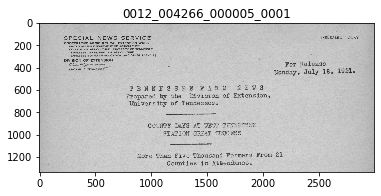

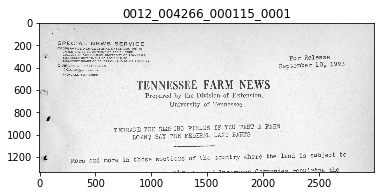

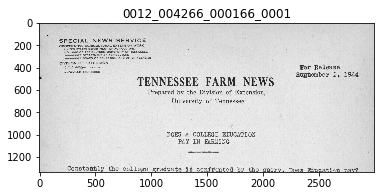

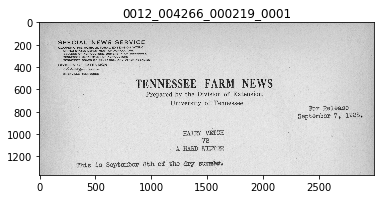

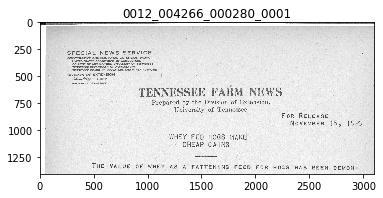

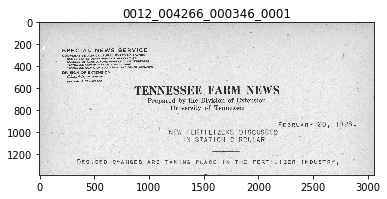

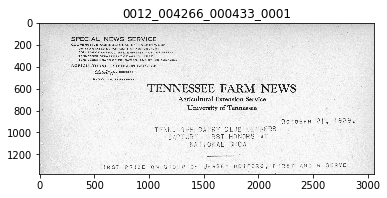

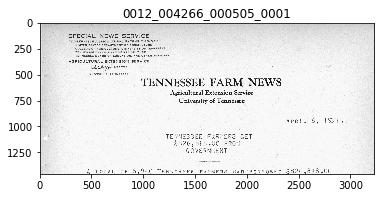

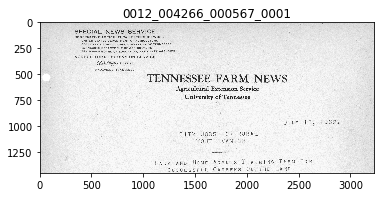

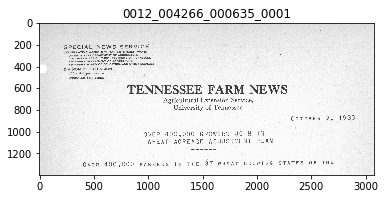

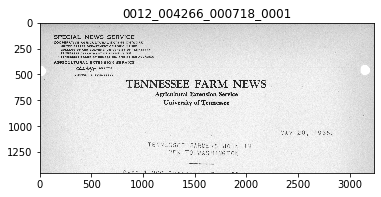

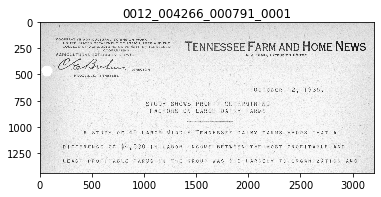

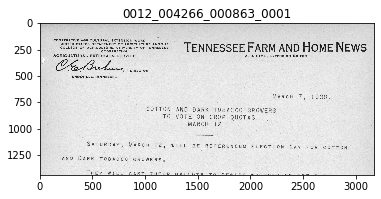

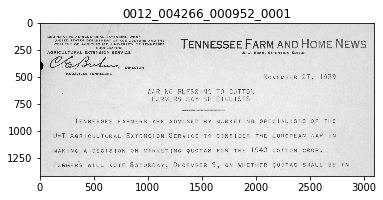

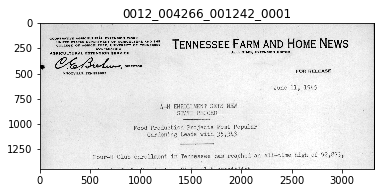

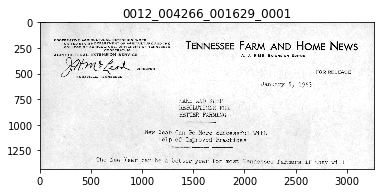

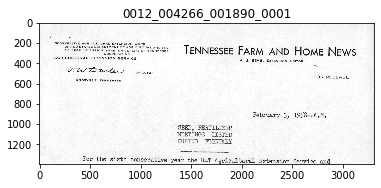

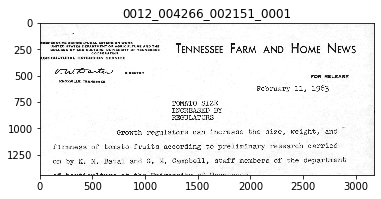

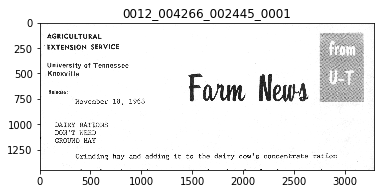

In [37]:
# let's look at the top 1250 pixels of every 4th grayscale image cover
for image_path in gray_image_paths_list[::4]:
    image = Image.open(image_path)
    width, height = image.size
    box = (0, 0, width, int(height/3))  # (left, upper, right, lower)
    image_cropped = image.crop(box=box)
    plt.imshow(image_cropped, cmap='gray')
    plt.title(image_path.stem)
    plt.show()

In [35]:
# need to verify the first image's title, so go ahead and open it up
for image_path in gray_image_paths_list:
    if image_path.stem.endswith('_000005_0001'):
        !open {str(image_path)}

The following titles are grayscale scans:
* Tennessee Farm News (multiple font/sizes in use)
* Tennessee farm and home news
* Farm news

In [38]:
# Need to get title crops from the grayscale images and test those with SIFT
# THEN test running it blind on all the images and see if that adds more identification errors

gray_images_search_for_dict = {}

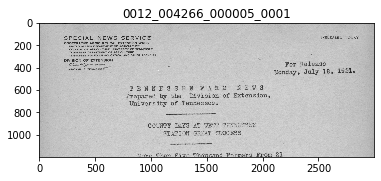

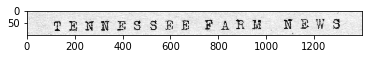

In [54]:
# get sample image from Tennesse Farm News_early
tn_farm_news_early_path = [x for x in gray_image_paths_list if x.stem.endswith('_000005_0001')][0]
tn_farm_news_early = Image.open(tn_farm_news_early_path)
tn_farm_news_early = get_top_percent_of_image(tn_farm_news_early, 0.3)
plt.imshow(tn_farm_news_early, cmap='gray')
plt.title(tn_farm_news_early_path.stem)
plt.show()

box = (700, 525, 2100, 625)  # (left, upper, right, lower)
tn_farm_news_early_title_crop = tn_farm_news_early.crop(box)
plt.imshow(tn_farm_news_early_title_crop, cmap='gray')
plt.show()

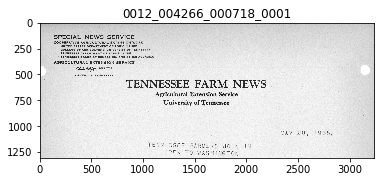

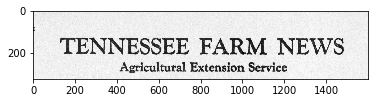

In [96]:
# get sample image from Tennesse Farm News_late
tn_farm_news_late_path = [x for x in gray_image_paths_list if x.stem.endswith('_000718_0001')][0]
tn_farm_news_late = Image.open(tn_farm_news_late_path)
tn_farm_news_late = get_top_percent_of_image(tn_farm_news_late, 0.3)
plt.imshow(tn_farm_news_late, cmap='gray')
plt.title(tn_farm_news_late_path.stem)
plt.show()

# box = (800, 525, 2200, 650)  # (left, upper, right, lower)
box = (700, 425, 2300, 750)  # (left, upper, right, lower)
tn_farm_news_late_title_crop = tn_farm_news_late.crop(box)
plt.imshow(tn_farm_news_late_title_crop, cmap='gray')
plt.show()

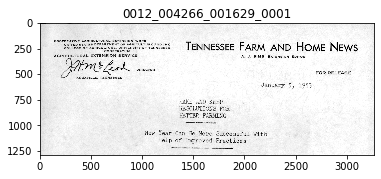

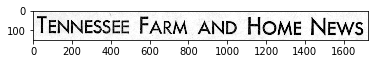

In [73]:
# get sample image from Tennessee farm and home news
tn_farm_and_home_news_path = [x for x in gray_image_paths_list if x.stem.endswith('_001629_0001')][0]
tn_farm_and_home_news = Image.open(tn_farm_and_home_news_path)
tn_farm_and_home_news = get_top_percent_of_image(tn_farm_and_home_news, 0.3)
plt.imshow(tn_farm_and_home_news, cmap='gray')
plt.title(tn_farm_and_home_news_path.stem)
plt.show()

box = (1400, 150, 3125, 300)  # (left, upper, right, lower)
tn_farm_and_home_news_title_crop = tn_farm_and_home_news.crop(box)
plt.imshow(tn_farm_and_home_news_title_crop, cmap='gray')
plt.show()

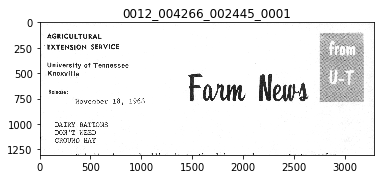

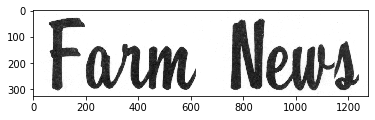

In [81]:
# get sample image from Farm news
farm_news_path = [x for x in gray_image_paths_list if x.stem.endswith('_002445_0001')][0]
farm_news = Image.open(farm_news_path)
farm_news = get_top_percent_of_image(farm_news, 0.3)
plt.imshow(farm_news, cmap='gray')
plt.title(farm_news_path.stem)
plt.show()

box = (1400, 475, 2675, 800)  # (left, upper, right, lower)
farm_news_title_crop = farm_news.crop(box)
plt.imshow(farm_news_title_crop, cmap='gray')
plt.show()

0012_004266_000005_0001
        testing for: Tennessee farm news_early
                   matches: 2415
                   ssim: 0.9999993071846777
        testing for: Tennessee farm news_late
                   matches: 14
        testing for: Tennessee farm and home news
                   matches: 3
        testing for: Farm news
                   matches: 9


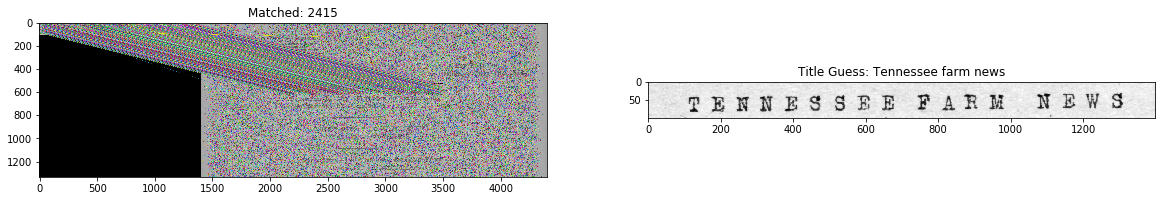

0012_004266_000075_0001
        testing for: Tennessee farm news_early
                   matches: 1
        testing for: Tennessee farm news_late
                   matches: 11
                   ssim: 0.008246761731080543
        testing for: Tennessee farm and home news
                   matches: 9
                   ssim: 0.026448092061001786
        testing for: Farm news
                   matches: 11
                   ssim: 0.04720127176965097


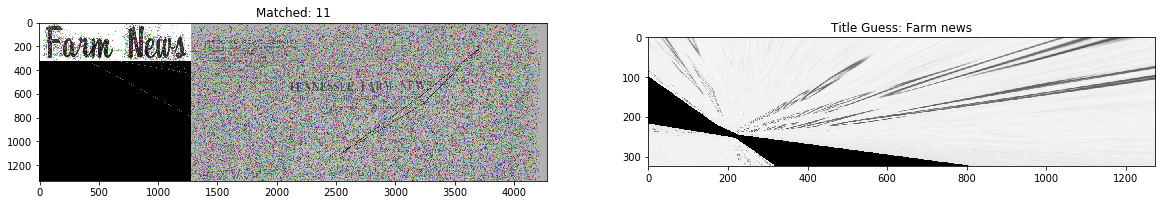

0012_004266_000115_0001
        testing for: Tennessee farm news_early
                   matches: 2
        testing for: Tennessee farm news_late
                   matches: 16
                   ssim: 0.03402263281621161
        testing for: Tennessee farm and home news
                   matches: 4
        testing for: Farm news
                   matches: 7


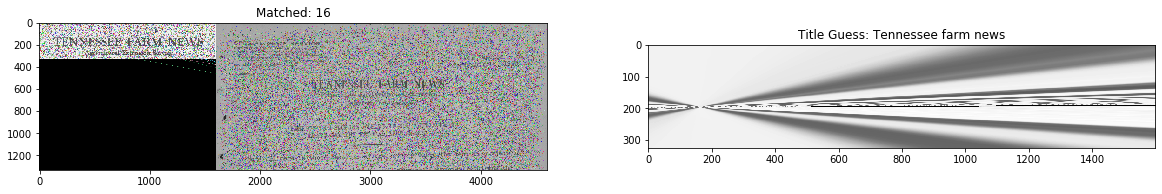

0012_004266_000142_0001
        testing for: Tennessee farm news_early
                   matches: 7
                   ssim: 0.012429812572498452
        testing for: Tennessee farm news_late
                   matches: 16
                   ssim: 0.028170763420722368
        testing for: Tennessee farm and home news
                   matches: 7
        testing for: Farm news
                   matches: 5


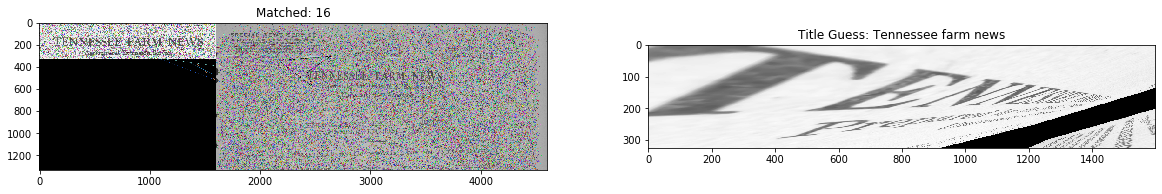

0012_004266_000166_0001
        testing for: Tennessee farm news_early
                   matches: 6
        testing for: Tennessee farm news_late
                   matches: 22
                   ssim: 0.03866034575581479
        testing for: Tennessee farm and home news
                   matches: 7
        testing for: Farm news
                   matches: 18
                   ssim: 0.06870187715253077


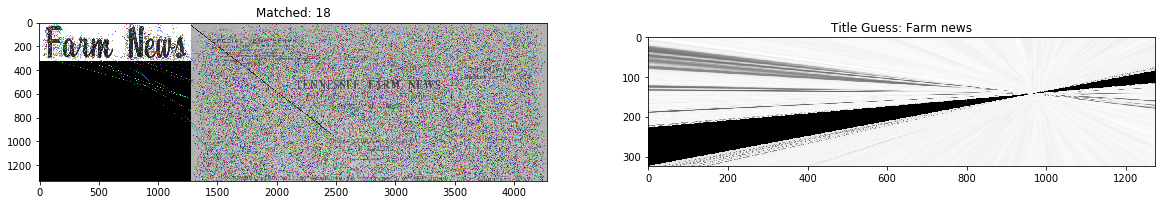

0012_004266_000190_0001
        testing for: Tennessee farm news_early
                   matches: 9
                   ssim: 0.0032481017559797135
        testing for: Tennessee farm news_late
                   matches: 11
                   ssim: 0.017632607698401217
        testing for: Tennessee farm and home news
                   matches: 10
                   ssim: 0.024234575375853554
        testing for: Farm news


KeyboardInterrupt: 

In [99]:
# identify title for all rgb images
gray_images_search_for_dict = {
    'Tennessee farm news_early': tn_farm_news_early_title_crop,
    'Tennessee farm news_late': tn_farm_news_late_title_crop,
    'Tennessee farm and home news': tn_farm_and_home_news_title_crop,
    'Farm news': farm_news_title_crop,
}

minimum_matches = 6

for image_path in gray_image_paths_list[::2]:
    
    print(image_path.stem)
    
    # load image and crop to top 1/3
    image = Image.open(image_path)
    width, height = image.size
    box = (0, 0, width, int(height/3))  # (left, upper, right, lower)
    image_cropped = image.crop(box)
    
    # resize image
    #image_cropped = img_qc.get_image_resized_pillow(image_cropped, height=int(height/4))
    
    #ratio = height / int(height/4)
    
    # get highest match among titles 
    most_matches = 0
    best_matched_image = ''
    best_found_image = ''
    best_title = ''
    best_ssim_with_title = -1  # ssim varies from -1 to 1 (perfect match)
    
    for title in gray_images_search_for_dict:
        image_search_for = gray_images_search_for_dict[title]
        #resize_height = int(image_search_for.size[1] * ratio)
        # shrink title by ratio
        #image_search_for = img_qc.get_image_resized_pillow(image_search_for, height=resize_height)
        print(f'        testing for: {title}')
        number_of_matches, matched_image, found_image = find_crop(image_search_for, image_cropped, minimum_matches, grayscale=True)
        if number_of_matches > minimum_matches:
            # go ahead and make a ssim comparison if we're within 60% of most matched title
            if number_of_matches > (most_matches * 0.6):
                # get the structural similarity index of the match with the image for a 2nd heuristic
                np_search_for = np.array(image_search_for)
                np_found = np.array(found_image)
                # print(f'search_for: {np_search_for.shape}')
                # print(f'found: {np_found.shape}')
                np_search_for = cv2.equalizeHist(np_search_for)
                np_found = cv2.equalizeHist(np_found)
                ssim_with_title = ssim(np_search_for, np_found, multichannel=True)
                print(f'                   ssim: {ssim_with_title}')
                if ssim_with_title > best_ssim_with_title:
                    best_ssim_with_title = ssim_with_title
                    most_matches = number_of_matches
                    best_matched_image = matched_image
                    best_found_image = found_image
                    best_title = title
    
    if best_title == 'Tennessee farm news_early' or best_title == 'Tennessee farm news_late':
        best_title = 'Tennessee farm news'
    
    # display images
    fig, axes = plt.subplots(1, 2, figsize=(20, 10))
    axes[0].imshow(best_matched_image, cmap='gray')
    axes[0].set_title(f'Matched: {most_matches}')
    axes[1].imshow(best_found_image, cmap='gray')
    axes[1].set_title(f'Title Guess: {best_title}')
    plt.show()